# What is Central Limit Theorem (CLT)

## Plot with matplotlib only

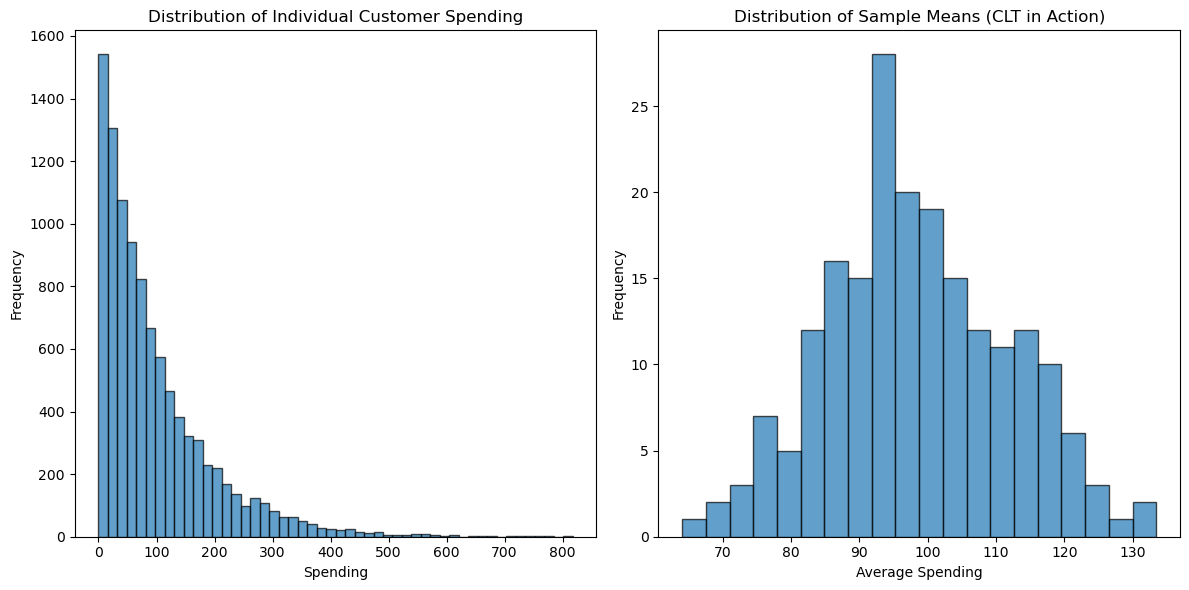

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Simulate individual customer spending (skewed distribution)
individual_spending = np.random.exponential(scale=100, size=10000)

# Plot the distribution of individual customer spending
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(individual_spending, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Individual Customer Spending')
plt.xlabel('Spending')
plt.ylabel('Frequency')

# Simulate the average spending of 50 customers, repeated 200 times
sample_means = []
for _ in range(200):
    sample = np.random.choice(individual_spending, size=50)
    sample_means.append(np.mean(sample))

# Plot the distribution of sample means (average spending for groups of 50 customers)
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sample Means (CLT in Action)')
plt.xlabel('Average Spending')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Plot with Seaborn

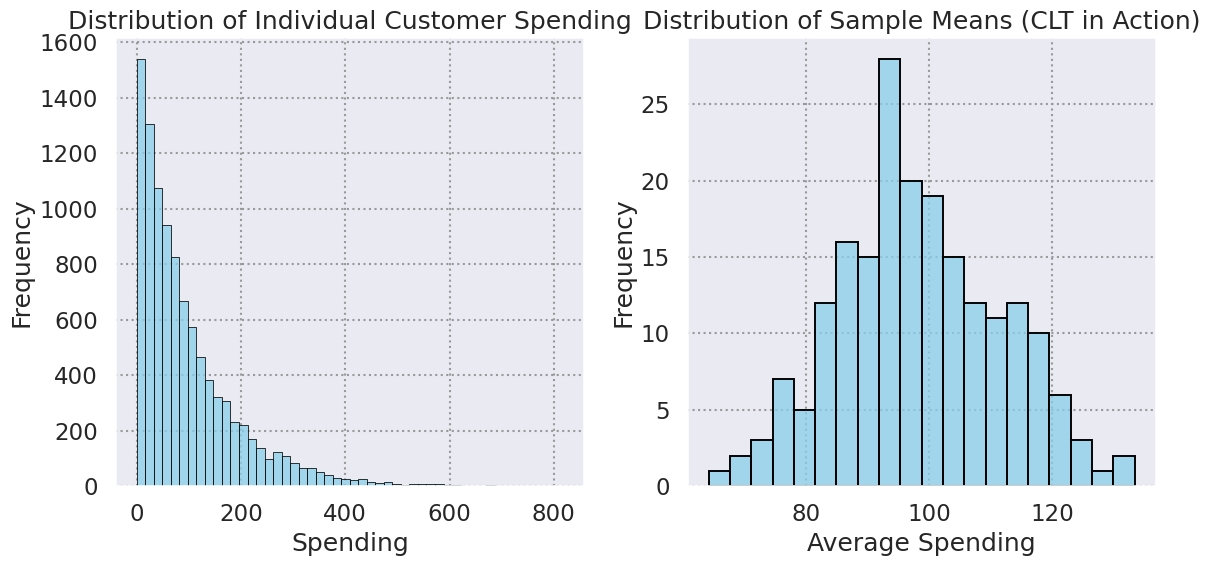

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Set up the Seaborn style
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_context("talk")

# Simulate individual customer spending (skewed distribution)
individual_spending = np.random.exponential(scale=100, size=10000)

# Plot the distribution of individual customer spending
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(individual_spending, bins=50, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Individual Customer Spending')
plt.xlabel('Spending')
plt.ylabel('Frequency')

# Simulate the average spending of 50 customers, repeated 200 times
sample_means = []
for _ in range(200):
    sample = np.random.choice(individual_spending, size=50)
    sample_means.append(np.mean(sample))

# Plot the distribution of sample means (average spending for groups of 50 customers)
plt.subplot(1, 2, 2)
sns.histplot(sample_means, bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Sample Means (CLT in Action)')
plt.xlabel('Average Spending')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## More plots about sampling distribution

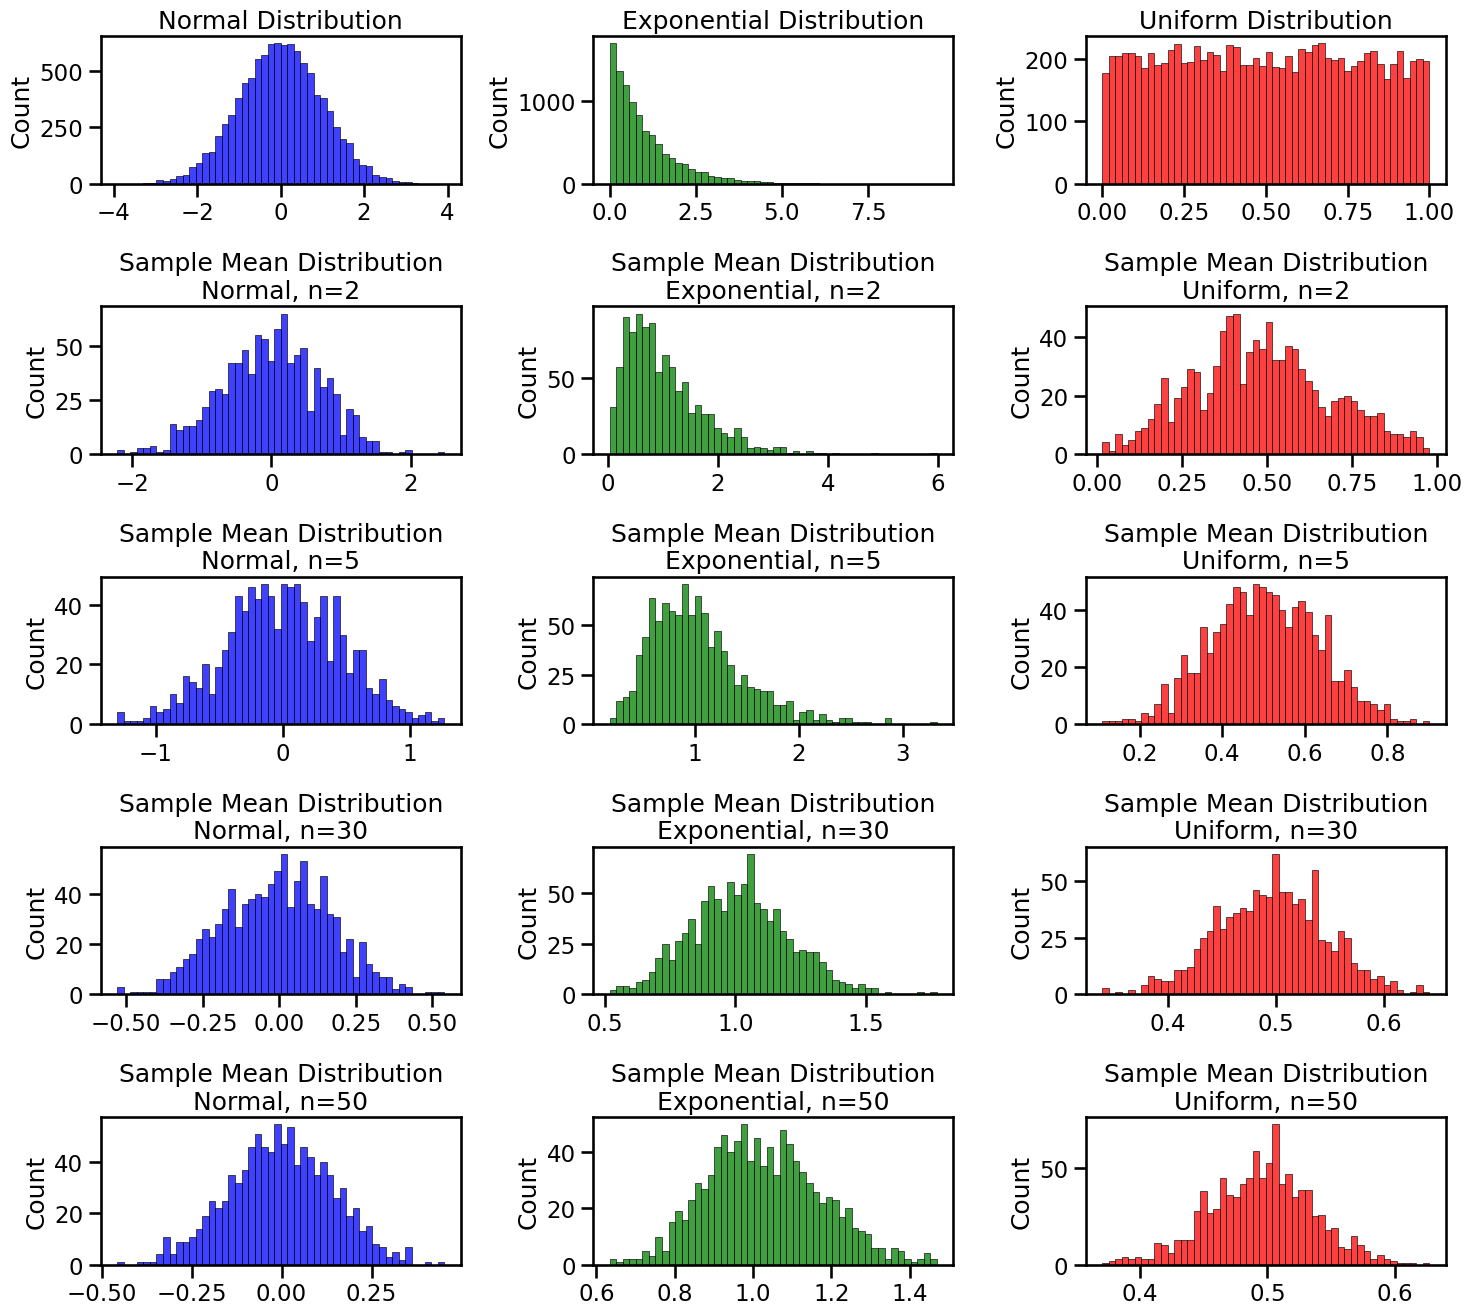

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)
sns.set_context("talk")

# Create the subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 13.5))

# Row 1: Different population distributions
populations = {
    'Normal': np.random.normal(0, 1, 10000),
    'Exponential': np.random.exponential(1, 10000),
    'Uniform': np.random.uniform(0, 1, 10000)
}

colors = ['blue', 'green', 'red']

for ax, (name, population), color in zip(axes[0], populations.items(), colors):
    sns.histplot(population, bins=50, ax=ax, color=color)
    ax.set_title(f'{name} Distribution')

# Rows 2-4: Sampling distributions of the sample mean for n = 2, 5, 30
sample_sizes = [2, 5, 30, 50]

for n, row_axes in zip(sample_sizes, axes[1:]):
    for ax, (name, population), color in zip(row_axes, populations.items(), colors):
        sample_means = [np.mean(np.random.choice(population, n)) for _ in range(1000)]
        sns.histplot(sample_means, bins=50, ax=ax, color=color)
        ax.set_title(f'Sample Mean Distribution\n{name}, n={n}')

plt.tight_layout()

# If you want to save the figure
# plt.savefig('CLT-12-normal.png')

plt.show()

# Normal Distribution vs t-distribution

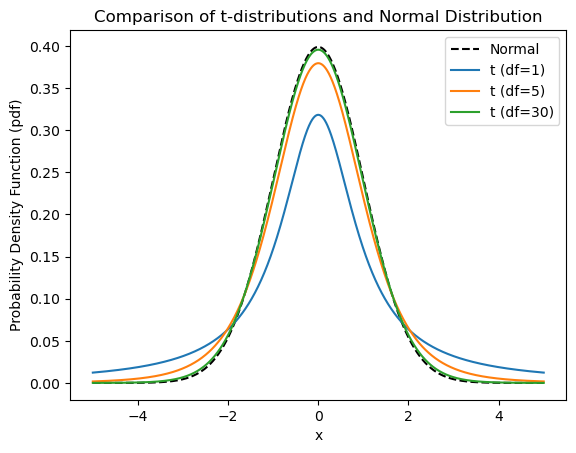

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t, norm

# Create an array of x values
x = np.linspace(-5, 5, 1000)

# Create an array of degrees of freedom to consider
dfs = [1, 5, 30]

# Plot the standard normal distribution for comparison
plt.plot(x, norm.pdf(x, 0, 1), label='Normal', color='black', linestyle='--')

# Plot t-distributions for various degrees of freedom
for df in dfs:
    plt.plot(x, t.pdf(x, df), label=f't (df={df})')

# Add legend and labels
plt.legend()
plt.title('Comparison of t-distributions and Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density Function (pdf)')

# Show the plot
plt.show()


## Using Seaborn

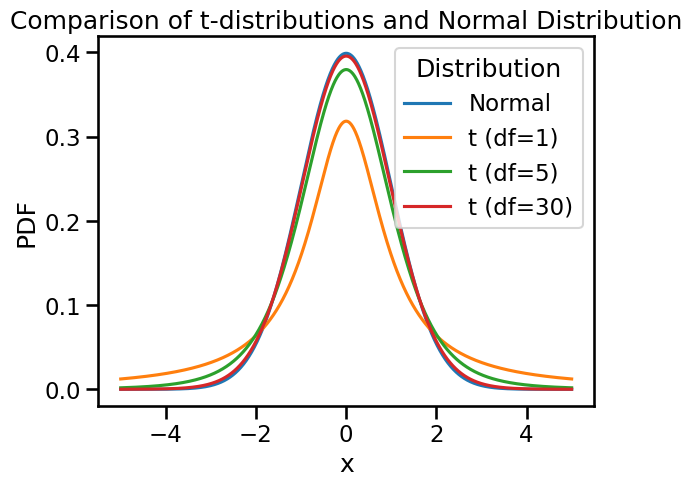

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t, norm

sns.set_context('talk')
# Create an array of x values
x = np.linspace(-5, 5, 1000)

# Create a DataFrame to hold the data
import pandas as pd
df = pd.DataFrame()

# Add the standard normal distribution to the DataFrame
df['x'] = x
df['Normal'] = norm.pdf(x, 0, 1)

# Add t-distributions for various degrees of freedom to the DataFrame
for degrees_freedom in [1, 5, 30]:
    df[f't (df={degrees_freedom})'] = t.pdf(x, degrees_freedom)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='x', var_name='Distribution', value_name='PDF')

# Create the Seaborn plot
sns.lineplot(x='x', y='PDF', hue='Distribution', data=df_melted)
plt.title('Comparison of t-distributions and Normal Distribution')
plt.show()


# Get z-(critical) value or t-(critical) value given significant level $\alpha$

In [4]:
from scipy.stats import norm

# For a two-tailed test with alpha = 0.05
alpha = 0.05
z_critical_two_tailed = norm.ppf(1 - alpha/2)

# For a one-tailed test with alpha = 0.05
z_critical_one_tailed = norm.ppf(1 - alpha)

In [5]:
from scipy.stats import t

# Degrees of freedom
degrees_freedom = 29  # For example, if sample size is 30

# For a two-tailed test with alpha = 0.05
alpha = 0.05
t_critical_two_tailed = t.ppf(1 - alpha/2, degrees_freedom)

# For a one-tailed test with alpha = 0.05
t_critical_one_tailed = t.ppf(1 - alpha, degrees_freedom)

In [9]:
# For example in the lecture note:
t_lecture =  t.ppf(1 - 0.05/2, 11)
print(t_lecture)

2.200985160082949


# How to get confidence interval using Python

Example Question in the Exercise 5 (Interval Estimation part, Q17)

A survey by Accountemps asked a sample of 200 executives to provide data on
the number of minutes per day office workers waste trying to locate mislabelled, misfiled or misplaced items. Data consistent with this survey are contained in the data set ‘ActTemps’.
- a. Use ‘ActTemps’ to develop a point estimate of the number of minutes per day office workers waste trying to locate mislabelled, misfiled or misplaced items.
- b. What is the sample standard deviation?
- c. What is the 95 per cent confidence interval for the mean number of minutes wasted per day?

In [19]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [20]:
# Read the dataset from CSV/Excel
df = pd.read_excel('Datasets 5.xlsx', 'ActTemps 8_17')
df

,Minutes
0,40
1,55
2,35
3,35
4,30
...,...
195,60
196,55
197,60
198,55


In [21]:
# Extract the 'Minutes' column into a NumPy array
data = df["Minutes"].values

In [22]:
# Calculate the sample mean and standard deviation
sample_mean = np.mean(data)

# Even though our sample size is large, but here I just show you 
# how to calculate sample std（should be n-1）
sample_std = np.std(data, ddof=1)

Please keep in mind the difference between sample std and population std if sample size is small

https://numpy.org/doc/stable/reference/generated/numpy.std.html

In [23]:
# Get the size of the sample
n = len(data)

# Calculate the critical value (z-value) for 95% confidence
z_critical = stats.norm.ppf(0.975)  # 1.96 for a 95% confidence level

# Calculate the margin of error
margin_of_error = z_critical * (sample_std / np.sqrt(n))

# Calculate the confidence intervals
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Sample Mean: {sample_mean}")
print(f"Confidence Interval: {confidence_interval}")

Sample Mean: 49.8
Confidence Interval: (47.58368587536322, 52.01631412463677)


Note: This code uses the Z-distribution (standard normal distribution) to calculate the confidence interval, which is generally appropriate for large sample sizes (usually n > 30) and known population standard deviations. If the sample size is small and the population standard deviation is unknown, the t-distribution is often more appropriate.

In [24]:
# Calculate the critical value (z-value) for 95% confidence
t_critical = stats.t.ppf(0.975, n-1)  # nv = n-1, 95% confidence level

# Calculate the margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(n))

# Calculate the confidence intervals
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Sample Mean: {sample_mean}")
print(f"Confidence Interval: {confidence_interval}")

Sample Mean: 49.8
Confidence Interval: (47.570124769300044, 52.02987523069995)


When we compare the above two results, they're quite similar.

The confidence interval can be interpreted as follows: if you were to sample from the population many times and calculate the 95% confidence interval in the same manner, you would expect about 95% of those intervals to contain the true population mean.

# Please try to do it for population proportion!

This is particularly useful in cases like survey data, where you might want to estimate what proportion of a larger population possesses a particular characteristic based on a sample.

Assuming you have a CSV file with a column called Response, where 1 indicates a "success" (e.g., answered "yes" to a survey question) and 0 indicates a "failure" (e.g., answered "no").

**The following code is exercutable ONLY IF dataset with name "your_data.csv" is provided!**

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Read the dataset from CSV
# Assuming the CSV has a column named 'Response'
df = pd.read_csv("your_data.csv")

# Extract the 'Response' column into a NumPy array
data = df['Response'].values

# Calculate the sample size and sample proportion
n = len(data)
p_hat = np.sum(data) / n

# Calculate the z-value for a 95% confidence level
z_critical = stats.norm.ppf(0.975)  # 1.96 for a 95% confidence level

# Calculate the margin of error
margin_of_error = z_critical * np.sqrt((p_hat * (1 - p_hat)) / n)

# Calculate the confidence interval
confidence_interval = (p_hat - margin_of_error, p_hat + margin_of_error)

print(f"Sample Proportion: {p_hat}")
print(f"Confidence Interval for Population Proportion: {confidence_interval}")

Please create a dataset for your own, and run the above code!